In [2]:
from toolbox import ToolBox
from tqdm import tqdm

from models import *

tqdm.pandas()

In [3]:
import pandas as pd
import numpy as np
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
tb = ToolBox()

In [5]:
df = tb.load_data_sql(table='user_reviews_clean', use_cache=True)
df = df[~df['review'].isnull()]
df.head()

Loading from database


,id,date,grade,game,review,sentiment
0,128002,2013-01-19,30,007-legends-pc,"Oh, my dear God! What is it with developers th...",-0.9191
1,128003,2014-06-23,30,007-legends-pc,Seriously if you want to have a HUGE laugh wit...,0.9424
2,128004,2014-12-11,0,007-legends-pc,godawful port of the xbox 360 version and ps3....,-0.3869
3,128005,2012-11-03,0,007-legends-pc,Agree. Worst game ever. Its a full copy of Cal...,0.5496
4,128006,2012-11-04,0,007-legends-pc,DO NOT BUY THIS GAME for the PC (or for any ot...,-0.9612


In [6]:
len(df)

211773

In [7]:
min_dates = pd.DataFrame(df.groupby('game', as_index=False)['date'].min())

In [8]:
min_dates.head()

,game,date
0,007-legends-pc,2012-11-03
1,007-legends-playstation-3,2012-10-16
2,007-legends-wii-u,2013-01-04
3,007-legends-xbox-360,2012-10-16
4,007-quantum-of-solace-pc,2011-06-22


In [9]:
min_dates.rename(columns={'date':'release_date'}, inplace=True)
min_dates.head()

,game,release_date
0,007-legends-pc,2012-11-03
1,007-legends-playstation-3,2012-10-16
2,007-legends-wii-u,2013-01-04
3,007-legends-xbox-360,2012-10-16
4,007-quantum-of-solace-pc,2011-06-22


In [10]:
df = pd.merge(df, min_dates, on='game')
df.head()

,id,date,grade,game,review,sentiment,release_date
0,128002,2013-01-19,30,007-legends-pc,"Oh, my dear God! What is it with developers th...",-0.9191,2012-11-03
1,128003,2014-06-23,30,007-legends-pc,Seriously if you want to have a HUGE laugh wit...,0.9424,2012-11-03
2,128004,2014-12-11,0,007-legends-pc,godawful port of the xbox 360 version and ps3....,-0.3869,2012-11-03
3,128005,2012-11-03,0,007-legends-pc,Agree. Worst game ever. Its a full copy of Cal...,0.5496,2012-11-03
4,128006,2012-11-04,0,007-legends-pc,DO NOT BUY THIS GAME for the PC (or for any ot...,-0.9612,2012-11-03


In [11]:
def difference_weeks(date, release_date):
    date_dif=date-release_date
    weeks = math.floor(date_dif/np.timedelta64(1,'W'))
    return weeks

In [223]:
def difference_months(date, release_date):
    date_dif=date-release_date
    weeks = math.floor(date_dif/np.timedelta64(1,'M'))
    return weeks

In [12]:
df['week'] = df.apply(lambda row: difference_weeks(row['date'], row['release_date']), axis=1)

In [225]:
df['month'] = df.apply(lambda row: difference_months(row['date'], row['release_date']), axis=1)

In [13]:
df.head()

,id,date,grade,game,review,sentiment,release_date,week
0,128002,2013-01-19,30,007-legends-pc,"Oh, my dear God! What is it with developers th...",-0.9191,2012-11-03,11
1,128003,2014-06-23,30,007-legends-pc,Seriously if you want to have a HUGE laugh wit...,0.9424,2012-11-03,85
2,128004,2014-12-11,0,007-legends-pc,godawful port of the xbox 360 version and ps3....,-0.3869,2012-11-03,109
3,128005,2012-11-03,0,007-legends-pc,Agree. Worst game ever. Its a full copy of Cal...,0.5496,2012-11-03,0
4,128006,2012-11-04,0,007-legends-pc,DO NOT BUY THIS GAME for the PC (or for any ot...,-0.9612,2012-11-03,0


In [14]:
def get_reviews_per_week(n_weeks, df):
    # define a dataframe 
    matrix = pd.DataFrame(np.zeros((len(df.groupby('game')), n_weeks), dtype=np.int8), index=df.game.unique())
    
    # enter reviews
    for index, row in df[df['week']<n_weeks].iterrows():
        matrix.loc[row['game'], row['week']] += 1
    
    return matrix

In [228]:
def get_reviews_per_month(n_months, df):
    # define a dataframe 
    matrix = pd.DataFrame(np.zeros((len(df.groupby('game')), n_months), dtype=np.int8), index=df.game.unique())
    
    # enter reviews
    for index, row in df[df['month']<n_months].iterrows():
        matrix.loc[row['game'], row['month']] += 1
    
    return matrix

In [15]:
reviews_weeks_games = get_reviews_per_week(10, df)

In [231]:
reviews_months_games = get_reviews_per_month(3, df)

In [16]:
reviews_weeks_games.head()

,0,1,2,3,4,5,6,7,8,9
007-legends-pc,6,1,1,0,0,0,1,0,0,0
007-legends-playstation-3,1,1,1,2,0,0,0,0,0,0
007-legends-wii-u,1,0,0,0,0,0,0,0,0,0
007-legends-xbox-360,5,3,1,0,1,1,0,0,0,1
007-quantum-of-solace-pc,2,0,0,0,1,0,0,0,0,0


In [232]:
reviews_months_games.head()

,0,1,2
007-legends-pc,8,1,1
007-legends-playstation-3,5,0,1
007-legends-wii-u,1,0,0
007-legends-xbox-360,10,1,3
007-quantum-of-solace-pc,3,0,0


In [17]:
reviews_weeks_games.describe()

,0,1,2,3,4,5,6,7,8,9
count,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000,13068.000000
mean,3.179369,0.823998,0.495103,0.373890,0.299357,0.255127,0.240282,0.225513,0.197735,0.191537
std,6.426677,2.439773,1.525846,1.327954,0.916208,0.858176,0.913723,0.851597,0.683753,0.663562
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,153.000000,99.000000,67.000000,79.000000,17.000000,29.000000,34.000000,38.000000,27.000000,19.000000


Text(0, 0.5, 'nr_reviews')

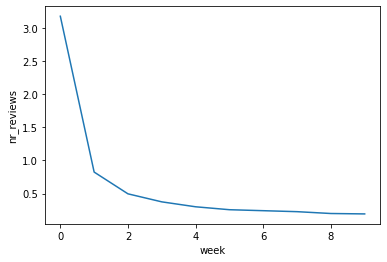

In [18]:
plt.plot(reviews_weeks_games.mean(axis=0))
plt.xlabel('week')
plt.ylabel('nr_reviews')

In [238]:
reviews_months_games.describe()

,0,1,2
count,13068.000000,13068.000000,13068.000000
mean,5.005127,1.029079,0.743572
std,10.494350,2.869245,2.028452
min,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,4.000000,1.000000,1.000000
max,249.000000,121.000000,61.000000


Text(0, 0.5, 'nr_reviews')

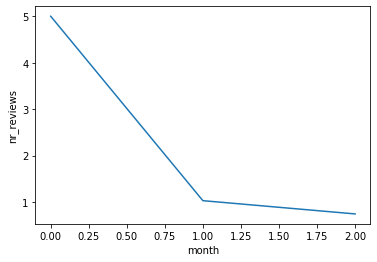

In [239]:
plt.plot(reviews_months_games.mean(axis=0))
plt.xlabel('month')
plt.ylabel('nr_reviews')

In [241]:
reviews_months_games[np.min(reviews_months_games, axis=1) > 5]

,0,1,2
a-hat-in-time-pc,30,13,9
a-plague-tale-innocence-pc,64,10,9
a-plague-tale-innocence-playstation-4,67,6,13
alien-swarm-pc,14,6,6
aliens-colonial-marines-xbox-360,46,12,8
amnesia-a-machine-for-pigs-pc,24,12,7
anthem-pc,79,20,17
anthem-playstation-4,82,17,13
apex-legends-pc,67,19,11
arms-switch,24,6,6


In [19]:
reviews_weeks_games.reset_index(inplace=True)

In [20]:
reviews_weeks_games.rename(columns={'index': 'game'}, inplace=True)

In [22]:
user_reviews = reviews_weeks_games.melt(id_vars=['game'], var_name='week', value_name='nr_reviews')

In [23]:
user_reviews.sort_values(['game', 'week'], inplace=True)

In [29]:
user_reviews.head(20)

,game,week,nr_reviews
0,007-legends-pc,0,6
13068,007-legends-pc,1,1
26136,007-legends-pc,2,1
39204,007-legends-pc,3,0
52272,007-legends-pc,4,0
65340,007-legends-pc,5,0
78408,007-legends-pc,6,1
91476,007-legends-pc,7,0
104544,007-legends-pc,8,0
117612,007-legends-pc,9,0


In [38]:
user_reviews.shape

(130680, 3)

In [25]:
df.head()

,id,date,grade,game,review,sentiment,release_date,week
0,128002,2013-01-19,30,007-legends-pc,"Oh, my dear God! What is it with developers th...",-0.9191,2012-11-03,11
1,128003,2014-06-23,30,007-legends-pc,Seriously if you want to have a HUGE laugh wit...,0.9424,2012-11-03,85
2,128004,2014-12-11,0,007-legends-pc,godawful port of the xbox 360 version and ps3....,-0.3869,2012-11-03,109
3,128005,2012-11-03,0,007-legends-pc,Agree. Worst game ever. Its a full copy of Cal...,0.5496,2012-11-03,0
4,128006,2012-11-04,0,007-legends-pc,DO NOT BUY THIS GAME for the PC (or for any ot...,-0.9612,2012-11-03,0


In [32]:
reviews_grouped = df.groupby(['game', 'week'], as_index=False).agg({'grade': 'mean', 'sentiment': 'std'})

In [35]:
reviews_grouped.rename(columns={'grade': 'avg_grade', 'sentiment': 'sentiment_var'}, inplace=True)

In [36]:
reviews_grouped.head()

,game,week,avg_grade,sentiment_var
0,007-legends-pc,0,0.0,0.578638
1,007-legends-pc,1,10.0,NaN
2,007-legends-pc,2,100.0,NaN
3,007-legends-pc,6,70.0,NaN
4,007-legends-pc,11,30.0,NaN


In [37]:
reviews_grouped.shape

(140562, 4)

In [39]:
user_reviews = pd.merge(user_reviews, reviews_grouped, how='left', on=['game', 'week'])

In [40]:
user_reviews.head()

,game,week,nr_reviews,avg_grade,sentiment_var
0,007-legends-pc,0,6,0.0,0.578638
1,007-legends-pc,1,1,10.0,NaN
2,007-legends-pc,2,1,100.0,NaN
3,007-legends-pc,3,0,NaN,NaN
4,007-legends-pc,4,0,NaN,NaN


In [48]:
len(user_reviews[user_reviews['sentiment_var'].notnull()])

12371

In [51]:
user_reviews.to_pickle('user_reviews.pkl')

In [52]:
user_reviews = pd.read_pickle('user_reviews.pkl')

In [56]:
user_reviews.describe()

,nr_reviews,avg_grade,sentiment_var
count,130680.000000,31734.000000,12371.000000
mean,0.628191,69.264925,0.508126
std,2.509015,27.579725,0.393629
min,0.000000,0.000000,0.000000
25%,0.000000,54.000000,0.106839
50%,0.000000,80.000000,0.509965
75%,0.000000,90.000000,0.820395
max,153.000000,100.000000,1.409759


In [55]:
user_reviews.corr()

,nr_reviews,avg_grade,sentiment_var
nr_reviews,1.000000,-0.014470,0.106761
avg_grade,-0.014470,1.000000,-0.357914
sentiment_var,0.106761,-0.357914,1.000000


In [53]:
from linearmodels.panel import PanelOLS
import statsmodels.api as sm

In [54]:
data = user_reviews.set_index(['game', 'week'])
dependent = data.nr_reviews
exog = sm.add_constant(data[['sentiment_var', 'avg_grade']])
mod = PanelOLS(dependent, exog)
res = mod.fit(cov_type='unadjusted')
res

/Users/myrthe/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/myrthe/anaconda3/lib/python3.7/site-packages/linearmodels/utility.py:478: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


Dep. Variable:,nr_reviews,R-squared:,0.0120
Estimator:,PanelOLS,R-squared (Between):,-0.0264
No. Observations:,12371,R-squared (Within):,0.0070
Date:,"Wed, Oct 23 2019",R-squared (Overall):,0.0120
Time:,20:01:18,Log-likelihood,-4.08e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,74.939
Entities:,4455,P-value,0.0000
Avg Obs:,2.7769,Distribution:,"F(2,12368)"
Min Obs:,1.0000,,
Max Obs:,10.0000,F-statistic (robust):,74.939
